In [174]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures

# In this notebook

## (A) Fundamental functions
    - Cost and gradient for regularized logistic regression
    - Gradient descent for regularized logistic regression

## (B) Using microchip QA dataset 




# References

- [Introduction to statistical learning] (http://fs2.american.edu/alberto/www/analytics/ISLRLectures.html)
- [Elements of statistical learning] (https://web.stanford.edu/~hastie/ElemStatLearn/)
- [Machine learning] (https://www.coursera.org/learn/machine-learning)

# (A) Fundamental functions

### Cost and gradient

In [390]:
def CostGrad(W, y , X , lambda_L2):
    ''' 
    Input: 
        - W          : Vector of parameters to be learnd
        - y          : The true response variable
        - X          : The data frame of predictors
        - lambda_L2  : The L2 regularization parameter (same as alpha in packages such as sklearn)
    Output: cost and gradient 
    '''
    
    m , n = X.shape[0] , X.shape[1] 
        
    ZeroOnes = np.ones((n,1))
    ZeroOnes[0] = 0
    
    y_hat = 1 / (1 + np.exp(-X@W))
    
    cost = (- ((1/m)*(y.T@np.log(y_hat) + (1 - y).T@np.log(1-y_hat) )) + (lambda_L2/m/2) * sum((W*ZeroOnes)**2)).values[0][0] # 
    grad =   (1/m)* ( (y_hat.values - y.values).T @ X ).T + (lambda_L2/m) * W*ZeroOnes
    return cost, grad

### Gradient descent 

In [392]:
def GD(X, y , N_iter, alpha, lambda_L2): 
    '''
    Input: 
        - X      : Dataframe of predictors/featuers
        - y      : True response variable (ground truth)
        - N_iter : Number of iterations in gradient descent 
        - alpha  : correction factor in gradient descent 
    Output: Learned parameters
    '''
    
    m , n = X.shape[0] , X.shape[1] 
    W     = (np.random.randn(n)/100).reshape(-1,1)   # Initialize the  weights
    for ii in range(N_iter):
    
        y_hat       = 1 / (1 + np.exp(-X@W))
        cost, grad  = CostGrad(W, y, X, lambda_L2)
        W          -= alpha * grad        
    return W

# (B) Using mircochip QA dataset

In [393]:
# Load the credit data 
print('Original DataFrame', 10*'-')
DF = pd.read_csv('ex2data2.txt', sep = ',', header=None) 
display(DF.head())

# -----------------------------------------------------

# Predictor variables
print(' ')
print('Predictors', 10*'-')
x = DF.iloc[: , :-1]
display(x.head())

# -----------------------------------------------------

# Response variables
print(' ')
print('Response variable', 10*'-')
y = DF.iloc[: , -2:].drop(list(DF.columns)[-2], axis=1)
display(y.head())

Original DataFrame ----------


,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


 
Predictors ----------


,0,1
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


 
Response variable ----------


,2
0,1
1,1
2,1
3,1
4,1


# Visualize the data

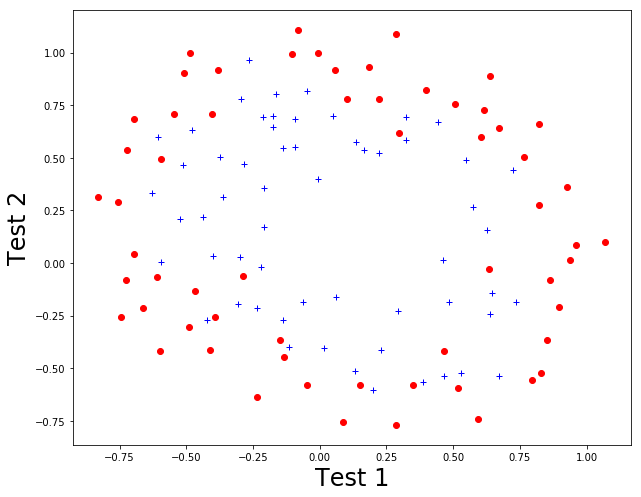

In [394]:
DF = pd.read_csv('ex2data2.txt', sep = ',', header=None)

plt.figure(figsize=(10,8))
plt.plot()
plt.plot(DF[DF[2]==1].iloc[:,0] , DF[DF[2]==1].iloc[:,1], 'b+')
plt.plot(DF[DF[2]==0].iloc[:,0] , DF[DF[2]==0].iloc[:,1], 'ro')
plt.xlabel('Test 1', fontsize=24)
plt.ylabel('Test 2', fontsize=24)
plt.show()

### Complexify the feature space of the two predictors using Poly Features

In [397]:
from sklearn.preprocessing import PolynomialFeatures
MakePoly = PolynomialFeatures(degree=6, include_bias=True)
x_complex = pd.DataFrame(MakePoly.fit_transform(x))
display(x_complex.head())

X = x_complex

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


# Test 1 for  cost and gradient
    - Expected : 0.693
    - Expected gradient (1st 5) : ' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n'

In [398]:
cost, grad = CostGrad(np.zeros((28,1)) , y , X , lambda_L2=1)
display(round(cost,3))
display(grad[:5])


0.693

array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02]])

# Test 2 for  cost and gradient
    - Expected : 3.16
    - Expected gradient (1st 5) : ' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n'

In [399]:
cost, grad = CostGrad(np.ones((28,1)) , y , X , lambda_L2=10)
display(round(cost,3))
display(grad[:5])


3.165

array([[0.34604507],
       [0.16135192],
       [0.19479576],
       [0.22686278],
       [0.09218568]])

# Train :  use gradient descent to learn the fitting parameters with lambda = 1

In [400]:
W = GD(X, y , N_iter=500, alpha=0.1, lambda_L2=1)

# Input data for predictions

In [401]:
N_smp = 101
Test1 = np.linspace(-1, 1.2, N_smp).reshape(-1,1)
Test2 = np.linspace(-1, 1.2, N_smp).reshape(-1,1)
TEST1 , TEST2 = np.meshgrid(Test1, Test2)

Preds = np.zeros((N_smp,N_smp))

# Make predictions

In [403]:
for ii in range(len(Test1)):
    
    f1 = np.ones((N_smp,1)) * Test1[ii]
    x  = pd.DataFrame(np.concatenate((f1,Test2), axis=1))    
    MakePoly  = PolynomialFeatures(degree=6, include_bias=True)
    x_complex = pd.DataFrame(MakePoly.fit_transform(x))
    
    Preds[:,ii] = (1/(1 + np.exp(-x_complex@W)) >0.5 ).values.reshape(N_smp,)
Preds.shape

(101, 101)

# Plot the decision boundary 

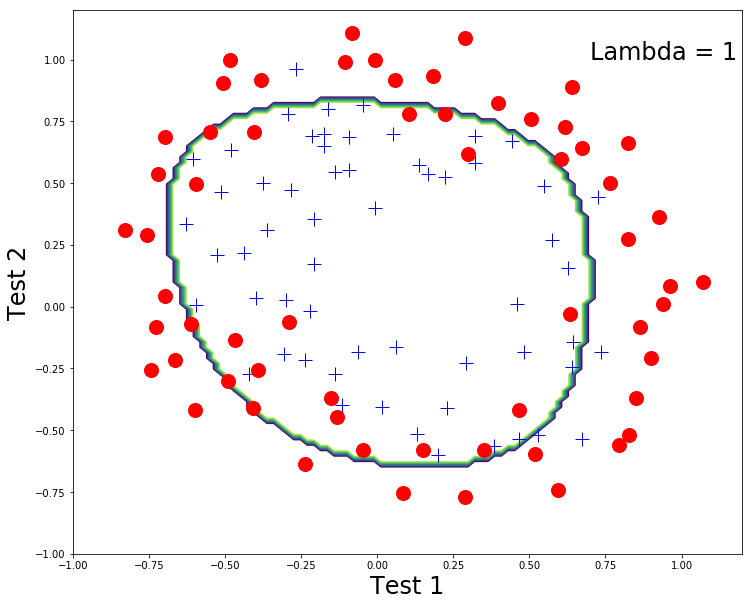

In [404]:
plt.figure(figsize=(12,10))
plt.contour(TEST1 , TEST2, Preds)
plt.plot(DF[DF[2]==1].iloc[:,0] , DF[DF[2]==1].iloc[:,1], 'b+', markersize=14)
plt.plot(DF[DF[2]==0].iloc[:,0] , DF[DF[2]==0].iloc[:,1], 'ro', markersize=14)
plt.xlabel('Test 1', fontsize=24)
plt.ylabel('Test 2', fontsize=24)
plt.text(.7,1,'Lambda = 1', fontsize=24)
plt.show()

# Train :  use gradient descent to learn the fitting parameters with lambda = 100

In [405]:
W = GD(X, y , N_iter=500, alpha=0.1, lambda_L2=100)

# Input data for predictions

In [406]:
N_smp = 101
Test1 = np.linspace(-1, 1.2, N_smp).reshape(-1,1)
Test2 = np.linspace(-1, 1.2, N_smp).reshape(-1,1)
TEST1 , TEST2 = np.meshgrid(Test1, Test2)

Preds = np.zeros((N_smp,N_smp))

In [407]:
for ii in range(len(Test1)):
    
    f1 = np.ones((N_smp,1)) * Test1[ii]
    x  = pd.DataFrame(np.concatenate((f1,Test2), axis=1))    
    MakePoly  = PolynomialFeatures(degree=6, include_bias=True)
    x_complex = pd.DataFrame(MakePoly.fit_transform(x))
    
    Preds[:,ii] = (1/(1 + np.exp(-x_complex@W)) >0.5 ).values.reshape(N_smp,)
Preds.shape

(101, 101)

# Plot the decision boundary 

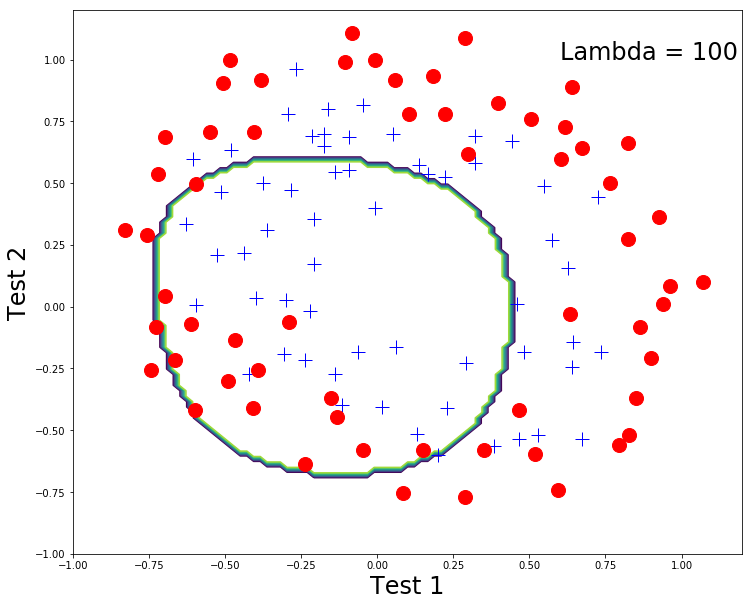

In [408]:
plt.figure(figsize=(12,10))
plt.contour(TEST1 , TEST2, Preds)
plt.plot(DF[DF[2]==1].iloc[:,0] , DF[DF[2]==1].iloc[:,1], 'b+', markersize=14)
plt.plot(DF[DF[2]==0].iloc[:,0] , DF[DF[2]==0].iloc[:,1], 'ro', markersize=14)
plt.xlabel('Test 1', fontsize=24)
plt.ylabel('Test 2', fontsize=24)
plt.text(.6,1,'Lambda = 100', fontsize=24)
plt.show()